In [34]:
from io import BytesIO
import tempfile
import numpy as np
import scipy.signal as sg
import pydub
import matplotlib.pyplot as plt
from IPython.display import Audio, display
%matplotlib inline

In [12]:
# Transformo el audio a mp3

pydub.AudioSegment.from_file('./Plaza Matadero.m4a').export("./maria.mp3", format="mp3")

<_io.BufferedRandom name='./maria.mp3'>

In [39]:
# Creo esta función que carga el mp3 y devuelve un array del sonido

def speak(data):
    # We convert the mp3 bytes to wav.
    audio = pydub.AudioSegment.from_mp3(data)
    with tempfile.TemporaryFile() as fn:
        wavef = audio.export(fn, format='wav')
        wavef.seek(0)
        wave = wavef.read()
    # We get the raw data by removing the 24 first
    # bytes of the header.
    x = np.frombuffer(wave, np.int16)[24:] / 2.**15
    return x, audio.frame_rate

In [44]:
# We create a function that plays a sound (represented by a NumPy vector) in the Notebook, 
# using IPython's Audio class

def play(x, fr, autoplay=False):
    display(Audio(x, rate=fr, autoplay=autoplay))

In [45]:
data = './maria.mp3'
x, fr = speak(data)

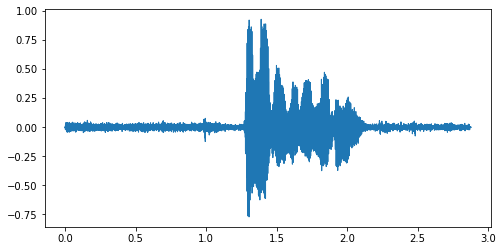

In [46]:
play(x, fr)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
t = np.linspace(0., len(x) / fr, len(x))
ax.plot(t, x, lw=1)

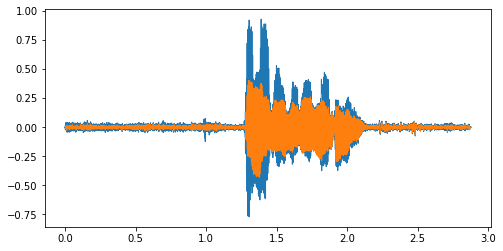

In [47]:
# Now, we will hear the effect of a Butterworth low-pass filter applied to this sound (500 Hz cutoff frequency)

b, a = sg.butter(4, 500. / (fr / 2.), 'low')
x_fil = sg.filtfilt(b, a, x)
play(x_fil, fr)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=1)
ax.plot(t, x_fil, lw=1)

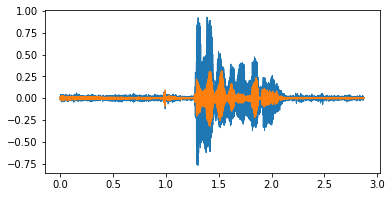

In [48]:
# Now, with a high-pass filter (1000 Hz cutoff frequency)

b, a = sg.butter(4, 1000. / (fr / 2.), 'high')
x_fil = sg.filtfilt(b, a, x)
play(x_fil, fr)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(t, x, lw=1)
ax.plot(t, x_fil, lw=1)